In [2]:
library("openxlsx")
library("tidyr")
library("dplyr")
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df1 <- read.xlsx(xlsxFile = 'QualidadeARO3.xlsx', sheet = 1, rows = 1:8785, cols = 1:10)
df1

,Antas-Espinho,Entrecampos,Estarreja,Ihavo,Laranjeiro-Almada,Mem-Martins,Paio-Pires,Restelo,Sobreiras-Porto,VNTelha-Maia
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,4,29,0,9,12,9,1,22,22
2,0,3,33,0,9,11,7,7,22,22
3,1,4,44,0,8,16,5,32,23,23
4,0,4,44,0,11,33,5,28,21,21
5,1,14,41,0,19,23,5,16,20,20
6,1,13,30,0,23,12,9,9,24,24
7,5,13,36,0,21,25,13,4,28,28
8,6,10,34,0,17,24,9,9,28,28
9,9,12,44,3,19,27,9,10,29,29


In [4]:
df1 <- df1 %>%
    mutate(across(everything(), as.double))

In [5]:
df1_tidy <- df1 %>%
  pivot_longer(names(.), names_to = "Estação", values_to = "O3")
df1_tidy

Estação,O3
<chr>,<dbl>
Antas-Espinho,2
Entrecampos,4
Estarreja,29
Ihavo,0
Laranjeiro-Almada,9
Mem-Martins,12
Paio-Pires,9
Restelo,1
Sobreiras-Porto,22


In [8]:
df1_final <- df1_tidy %>%  
  filter(grepl('Paio-Pires|Restelo', Estação))

Saving 6.67 x 6.67 in image



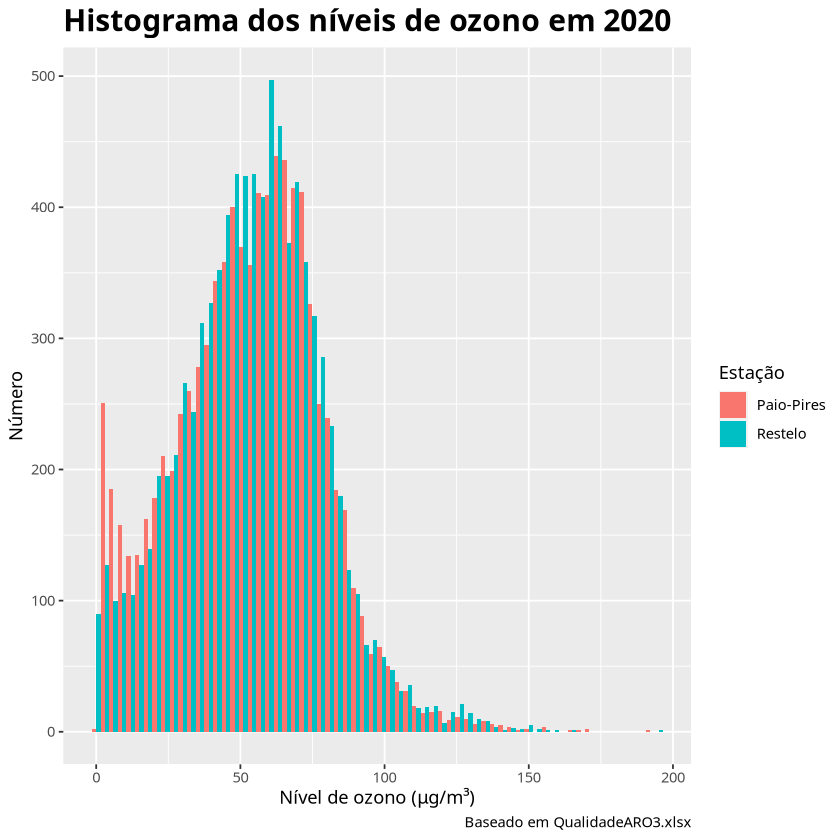

In [12]:
df1_plot <- ggplot(df1_final, aes(x = O3, fill = Estação)) +
    geom_histogram(binwidth = 3, alpha = 1, position = "dodge") +
    labs(y = "Número", x = "Nível de ozono (μg/m³)", title = "Histograma dos níveis de ozono em 2020", caption = "Baseado em QualidadeARO3.xlsx") +
    theme(plot.title = element_text(size = 18, face ="bold"))
ggsave("QualidadeARO3.png", df1_plot)
df1_plot